## Fit Generator에 넣기

In [38]:
import os
from glob import glob

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

import matplotlib.pyplot as plt
%matplotlib inline

## Hyperparameter Tunning

In [3]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=input_shape, filters=32, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu'),
    tf.keras.layers.MaxPool2D([2, 2], padding='same'),
    tf.keras.layers.Dropout(0.25),    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu'),
    tf.keras.layers.MaxPool2D([2, 2], padding='same'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

## Data Preprocess

In [46]:
train_paths = glob('../dataset/cifar/train/*.png')
test_paths = glob('../dataset/cifar/test/*.png')

In [10]:
path = train_paths[0]

def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name

In [25]:
class_names = [get_class_name(path) for path in train_paths]
classes = tf.unique(class_names).y.numpy()
classes

array([b'frog', b'automobile', b'ship', b'cat', b'deer', b'airplane',
       b'truck', b'dog', b'bird', b'horse'], dtype=object)

In [26]:
def onehot_encoding(label_name):
    classes == get_class_name(path)
    onehot_encoding = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encoding

In [51]:
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    image = tf.cast(image, tf.float32) / 255. # Noralization
    
    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    
    return image, label

In [52]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [53]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [54]:
transformed_image, transformed_label = image_preprocess(image, label)

transformed_image.shape

TensorShape([32, 32, 3])

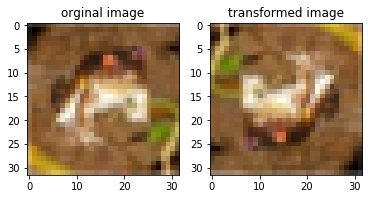

In [55]:
plt.subplot(121)
plt.title('orginal image')
plt.imshow(image)

plt.subplot(122)
plt.title('transformed image')
plt.imshow(transformed_image)

plt.show()

In [56]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocess) # transform image
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [57]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

## Training

In [60]:
steps_per_epoch = len(train_paths) # batch_size
validation_steps = len(test_paths) # batch_size

In [ ]:
model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

Epoch 1/10
 5679/50000 [==>...........................] - ETA: 1:35:34 - loss: 4.6425e-04 - accuracy: 0.9998